<a href="https://www.kaggle.com/code/rajeshkumarkarra/rajesh-karra-personality?scriptVersionId=249739936" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Validations on personality-dataset.csv

## Check my public link of this notebook
> https://www.kaggle.com/code/rajeshkumarkarra/rajesh-karra-personality

## Loading of dataset

In [37]:
pip install kagglehub[pandas-dataset] # Pre-requsites to load the dataset

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load a DataFrame with a specific version of a CSV
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "timothyadeyemi/personality-dataset",
    "personality_dataset.csv",
)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder


## Load Data



In [41]:
df # To fetch the data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [42]:
df.tail() # To fetch the last five rows

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


## Data Inspection

In [43]:
df.shape # To display the shape of the dataset

(2900, 8)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [45]:
df.columns # To fetch the column names

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [46]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [47]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())
    print('\n')

Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64


Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64


Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64




# Handling Duplicates

In [48]:
df.duplicated().sum()

402

In [49]:
# Remove all duplicate rows
df_cleaned = df.drop_duplicates()
df_cleaned

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.000000,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.000000,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.000000,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.000000,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.000000,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,3.564727,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.000000,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.000000,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.000000,Introvert


In [50]:
df_cleaned.shape  # after cleaned the duplicates

(2498, 8)

## Handle with null values

* We can see, we have no null-values in our dataset

In [51]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

## Explortory Data Enalysis (EDA)

In [52]:
df_cleaned.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [53]:
for i in df_cleaned.select_dtypes(include='object'):
    print('*******************')
    print(df[i].value_counts())

*******************
Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64
*******************
Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64
*******************
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


In [54]:
df_cleaned[['Personality']]

,Personality
0,Extrovert
1,Introvert
2,Introvert
3,Extrovert
4,Extrovert
...,...
2894,Extrovert
2896,Extrovert
2897,Introvert
2898,Introvert


In [55]:
pd.crosstab(df_cleaned.Stage_fear, df.Drained_after_socializing)

Drained_after_socializing,No,Yes
Stage_fear,,
No,1377,30
Yes,32,1059


<Axes: xlabel='Stage_fear'>

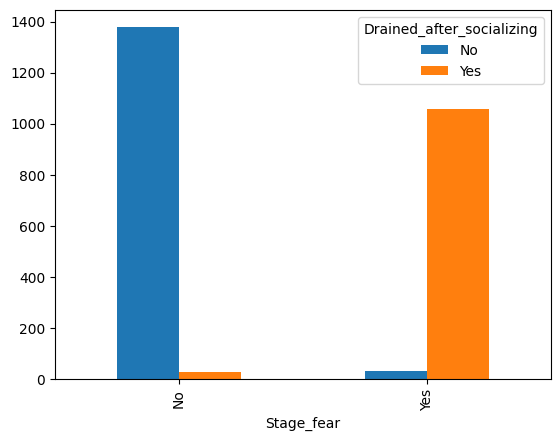

In [56]:
pd.crosstab(df_cleaned.Stage_fear, df_cleaned.Drained_after_socializing).plot(kind='bar')

In [57]:
num_column = df_cleaned.select_dtypes(include=['int64', 'float64'])
num_column

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,4.0,4.0,6.0,13.0,5.000000
1,9.0,0.0,0.0,0.0,3.000000
2,9.0,1.0,2.0,5.0,2.000000
3,0.0,6.0,7.0,14.0,8.000000
4,3.0,9.0,4.0,8.0,5.000000
...,...,...,...,...,...
2894,0.0,9.0,3.0,12.0,3.564727
2896,3.0,8.0,3.0,14.0,9.000000
2897,4.0,1.0,1.0,4.0,0.000000
2898,11.0,1.0,3.0,2.0,0.000000


In [58]:
cat_column = df_cleaned.select_dtypes(include='object')
cat_column

,Stage_fear,Drained_after_socializing,Personality
0,No,No,Extrovert
1,Yes,Yes,Introvert
2,Yes,Yes,Introvert
3,No,No,Extrovert
4,No,No,Extrovert
...,...,...,...
2894,No,No,Extrovert
2896,No,No,Extrovert
2897,Yes,Yes,Introvert
2898,Yes,Yes,Introvert


In [59]:
normal=[]
skew=[]
for i in num_column:
    if df_cleaned[i].skew()<0.5:
        normal.append(i)

    else:
        skew.append(i)

In [60]:
skew

['Time_spent_Alone']

In [61]:
df_cleaned.shape

(2498, 8)

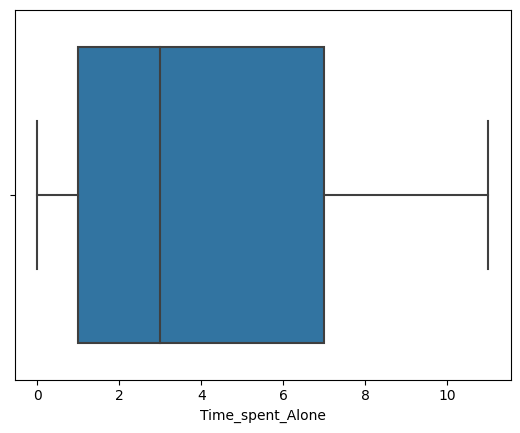

In [62]:
for i in skew:
    sns.boxplot(data=df_cleaned, x=i)
    plt.show()

In [63]:
from scipy.stats import zscore

In [64]:
df_zscore = df_cleaned[normal].apply(zscore)
df_zscore

,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,-0.069897,1.265368,1.508193,0.406606
1,-1.461817,-1.439329,-1.545842,-0.279813
2,-1.113837,-0.537763,-0.371213,-0.623023
3,0.626062,1.716151,1.743119,1.436236
4,1.670001,0.363802,0.333564,0.406606
...,...,...,...,...
2894,1.670001,-0.086981,1.273267,-0.085994
2896,1.322022,-0.086981,1.743119,1.779445
2897,-1.113837,-0.988546,-0.606139,-1.309442
2898,-1.113837,-0.086981,-1.075991,-1.309442


In [65]:
df_zscore.describe()

,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2.498000e+03,2.498000e+03,2.498000e+03,2.498000e+03
mean,-1.024001e-16,9.671118e-17,-1.251556e-16,-1.308445e-16
std,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00
min,-1.461817e+00,-1.439329e+00,-1.545842e+00,-1.309442e+00
25%,-7.658571e-01,-9.885461e-01,-8.410649e-01,-9.662327e-01
50%,-6.989750e-02,-8.698051e-02,-1.362875e-01,-2.798132e-01
75%,9.740419e-01,8.145851e-01,8.034157e-01,7.498161e-01
max,2.017981e+00,1.716151e+00,1.978045e+00,2.122655e+00


Text(0, 0.5, 'Count')

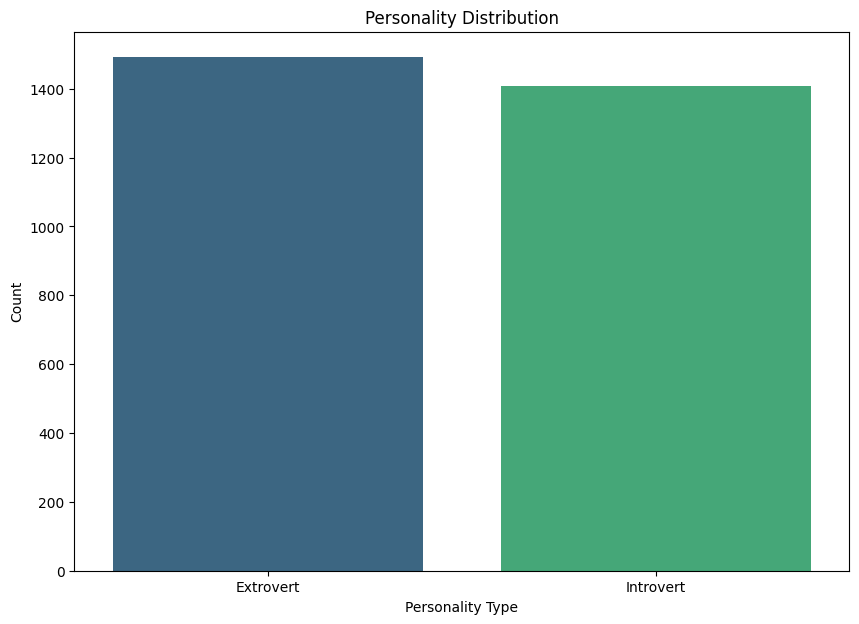

In [66]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Personality', data=df, palette = 'viridis')
plt.title('Personality Distribution', )
plt.xlabel('Personality Type')
plt.ylabel('Count')

## IQR

In [67]:
for i in skew:
    sns.boxplot(data= train, x = i)
    plt.show()

NameError: name 'train' is not defined

## Feature Engineering

In [68]:
for i in cat_column:
    print(df[i].value_counts())
    print('\n')

Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64


Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64


Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64




In [69]:
# Add percentages
total = len(df_cleaned)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)
    plt.show()

In [70]:
# Numerical features
num_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
num_features

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

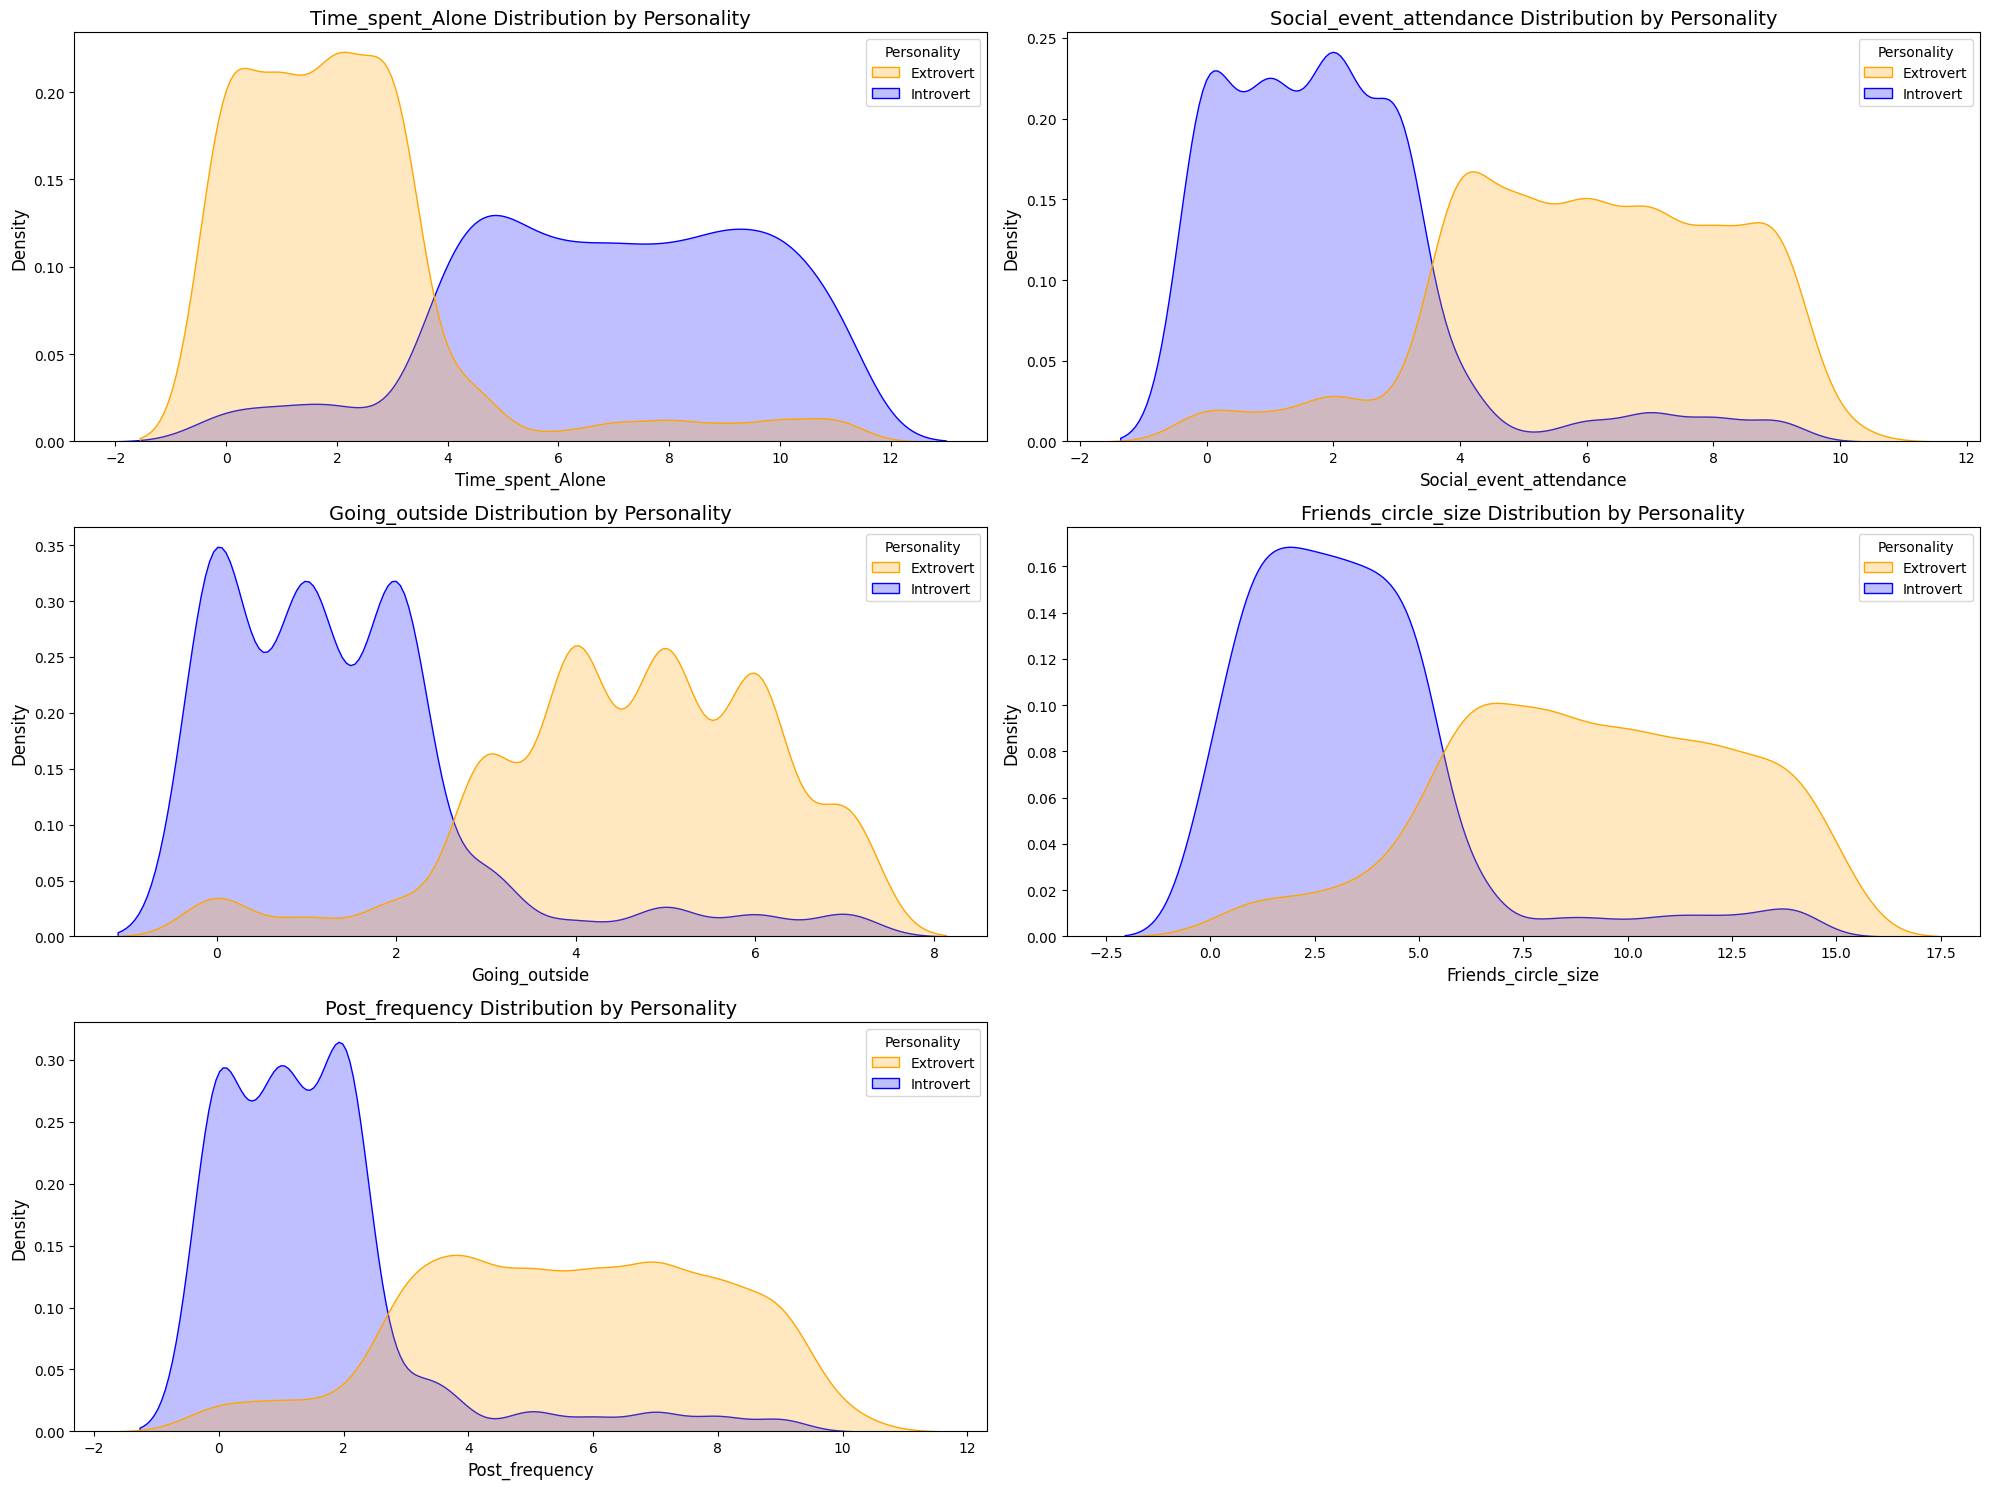

In [71]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df_cleaned, x=feature, hue='Personality', fill=True, common_norm=False, 
                palette={'Introvert': 'blue', 'Extrovert': 'orange'})
    plt.title(f'{feature} Distribution by Personality', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

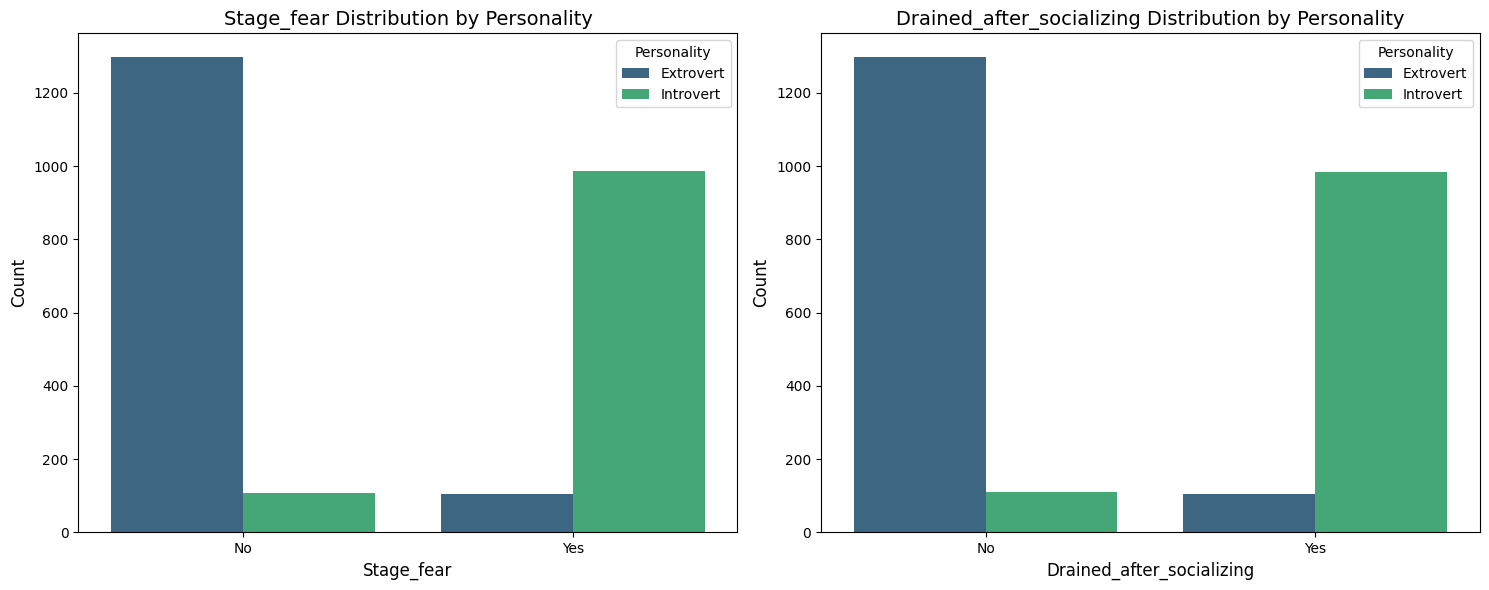

In [72]:
# Categorical features
cat_features = ['Stage_fear', 'Drained_after_socializing']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df_cleaned, x=feature, hue='Personality', palette='viridis')
    plt.title(f'{feature} Distribution by Personality', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Personality')
plt.tight_layout()
plt.show()

## Covert categoeical columns to numerical values

In [73]:
train = df_cleaned.copy()

In [74]:
train['Stage_fear'] = train['Stage_fear'].map({'yes': 1, 'No': 0})
train['Drained_after_socilizing'] = train['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
train['Personality'] = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [75]:
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Drained_after_socilizing
0,4.0,0.0,4.0,6.0,No,13.0,5.000000,1,0
1,9.0,NaN,0.0,0.0,Yes,0.0,3.000000,0,1
2,9.0,NaN,1.0,2.0,Yes,5.0,2.000000,0,1
3,0.0,0.0,6.0,7.0,No,14.0,8.000000,1,0
4,3.0,0.0,9.0,4.0,No,8.0,5.000000,1,0
...,...,...,...,...,...,...,...,...,...
2894,0.0,0.0,9.0,3.0,No,12.0,3.564727,1,0
2896,3.0,0.0,8.0,3.0,No,14.0,9.000000,1,0
2897,4.0,NaN,1.0,1.0,Yes,4.0,0.000000,0,1
2898,11.0,NaN,1.0,3.0,Yes,2.0,0.000000,0,1


In [76]:
train.isnull().sum()

Time_spent_Alone                0
Stage_fear                   1091
Social_event_attendance         0
Going_outside                   0
Drained_after_socializing       0
Friends_circle_size             0
Post_frequency                  0
Personality                     0
Drained_after_socilizing        0
dtype: int64

In [77]:
train.drop(['Stage_fear'], inplace=True, axis=1)

In [78]:
train.isnull().sum()

Time_spent_Alone             0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
Drained_after_socilizing     0
dtype: int64

In [79]:
train

,Time_spent_Alone,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Drained_after_socilizing
0,4.0,4.0,6.0,No,13.0,5.000000,1,0
1,9.0,0.0,0.0,Yes,0.0,3.000000,0,1
2,9.0,1.0,2.0,Yes,5.0,2.000000,0,1
3,0.0,6.0,7.0,No,14.0,8.000000,1,0
4,3.0,9.0,4.0,No,8.0,5.000000,1,0
...,...,...,...,...,...,...,...,...
2894,0.0,9.0,3.0,No,12.0,3.564727,1,0
2896,3.0,8.0,3.0,No,14.0,9.000000,1,0
2897,4.0,1.0,1.0,Yes,4.0,0.000000,0,1
2898,11.0,1.0,3.0,Yes,2.0,0.000000,0,1


In [80]:
train.columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency',
       'Personality', 'Drained_after_socilizing'],
      dtype='object')

In [81]:
train.drop(['Drained_after_socializing'], inplace=True, axis=1)

In [82]:
train.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Drained_after_socilizing
0,4.0,4.0,6.0,13.0,5.0,1,0
1,9.0,0.0,0.0,0.0,3.0,0,1
2,9.0,1.0,2.0,5.0,2.0,0,1
3,0.0,6.0,7.0,14.0,8.0,1,0
4,3.0,9.0,4.0,8.0,5.0,1,0


In [83]:
# Select features and target
X = train[['Time_spent_Alone' ]]
y = train[['Drained_after_socilizing']]


## Handling imbalance in dataset using smote

In [84]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [85]:
X.shape, y.shape

((2498, 1), (2498, 1))

In [86]:
X

,Time_spent_Alone
0,4.0
1,9.0
2,9.0
3,0.0
4,3.0
...,...
2894,0.0
2896,3.0
2897,4.0
2898,11.0


## Train_Test_Split

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [88]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1998, 1), (500, 1), (1998, 1), (500, 1))

# Model building 

## 1. Using Linear Regression

In [126]:
# Train the LinearRegression model
model_LR = LinearRegression()

In [127]:
model_LR.fit(X_train, y_train)

LinearRegression()

# Prediction

In [128]:
model_LR.score(X_test, y_test)

0.7031371448993247

In [131]:
y_pred = model_LR.predict(X_test)

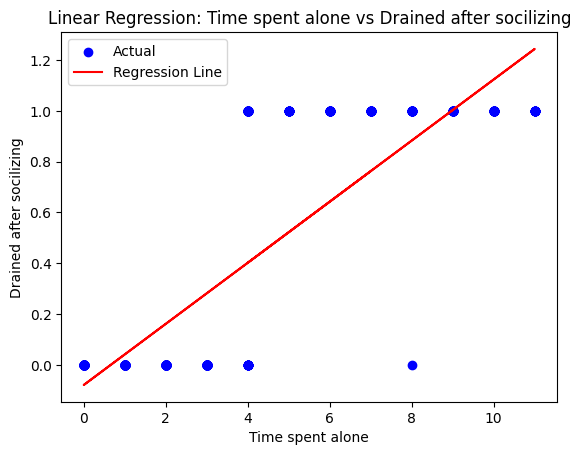

In [130]:

# Plot actual vs predicted
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Time spent alone')
plt.ylabel('Drained after socilizing')
plt.title('Linear Regression: Time spent alone vs Drained after socilizing')
plt.legend()
plt.show()

## Model Evaluation

In [132]:
print(X_test)
print(y_test)

      Time_spent_Alone
2626                 4
2096                 6
961                  7
2555                 9
1412                 2
...                ...
2321                 3
2090                 0
2093                 8
1251                 6
477                  7

[500 rows x 1 columns]
      Drained_after_socilizing
2626                         1
2096                         1
961                          1
2555                         1
1412                         0
...                        ...
2321                         0
2090                         0
2093                         1
1251                         1
477                          1

[500 rows x 1 columns]


In [96]:
X_test.sample(1)

,Time_spent_Alone
420,2.0


## Confusion Matrix to evalute model performance

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
y_test[0:10]

,Drained_after_socilizing
2626,1
2096,1
961,1
2555,1
1412,0
57,0
2242,1
853,1
864,1
962,1


In [99]:
X_test['Time_spent_Alone'] = X_test['Time_spent_Alone'].astype(int)


In [100]:
X_test

,Time_spent_Alone
2626,4
2096,6
961,7
2555,9
1412,2
...,...
2321,3
2090,0
2093,8
1251,6


In [101]:
y_predicted = model.predict(X_test)
y_predicted[0:10]

array([[0.40207015],
       [0.64246717],
       [0.76266569],
       [1.00306272],
       [0.16167312],
       [0.16167312],
       [0.40207015],
       [0.40207015],
       [1.12326123],
       [1.12326123]])

In [102]:
# Ensure both are integers
y_test_int = y_test.astype(int)
y_predicted_int = y_predicted.astype(int)
con_matrix = confusion_matrix(y_test_int, y_predicted_int)
con_matrix

array([[272,   0],
       [150,  78]])

Text(95.72222222222221, 0.5, 'y_pred')

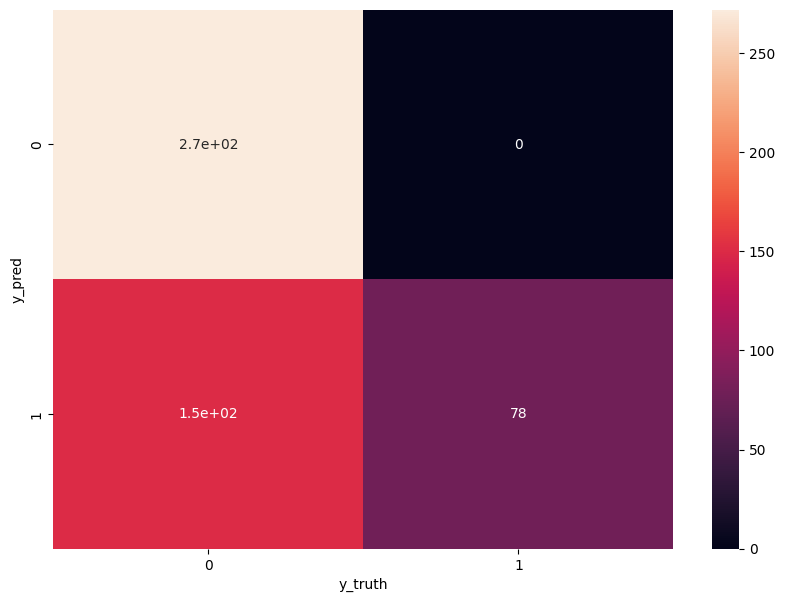

In [103]:
plt.figure(figsize=(10, 7))
sns.heatmap(con_matrix, annot=True)
plt.xlabel('y_truth')
plt.ylabel('y_pred')

## Classification Report

In [104]:
cls = classification_report(y_test_int, y_predicted_int)
print(cls)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       272
           1       1.00      0.34      0.51       228

    accuracy                           0.70       500
   macro avg       0.82      0.67      0.65       500
weighted avg       0.81      0.70      0.66       500



# Model Building (KNN)

In [105]:
!pip install scikit-learn
import sklearn
print(sklearn.__version__)
from sklearn.neighbors import KNeighborsClassifier
print("scikit-learn imported successfully!")



1.6.1
scikit-learn imported successfully!


In [124]:
model_KNN = KNeighborsClassifier(n_neighbors=4)
model_KNN.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [125]:
model_KNN.score(X_test, y_test)

0.972

## Evaluation Metrics

In [133]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_KNN.predict(X_test)

In [134]:
y_test[0:4]

,Drained_after_socilizing
2626,1
2096,1
961,1
2555,1


In [135]:
y_pred[0:4]

array([1, 1, 1, 1])

In [136]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[258,  14],
       [  0, 228]])

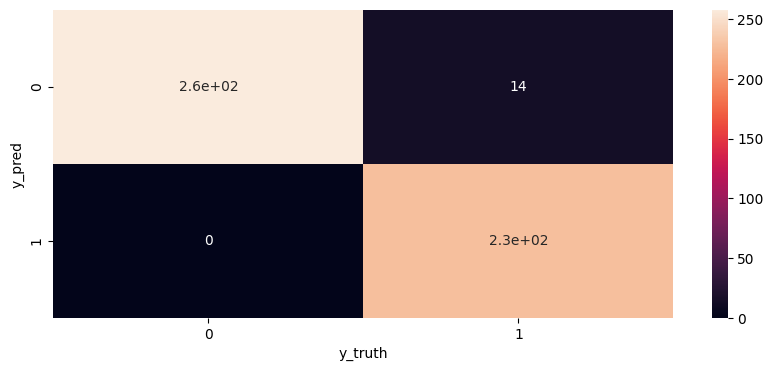

In [137]:
plt.figure(figsize = (10, 4))
sns.heatmap(con_mat, annot = True)
plt.xlabel('y_truth')
plt.ylabel('y_pred')
plt.show()

In [138]:
cls = classification_report(y_test, y_pred)
print(cls)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       272
           1       0.94      1.00      0.97       228

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



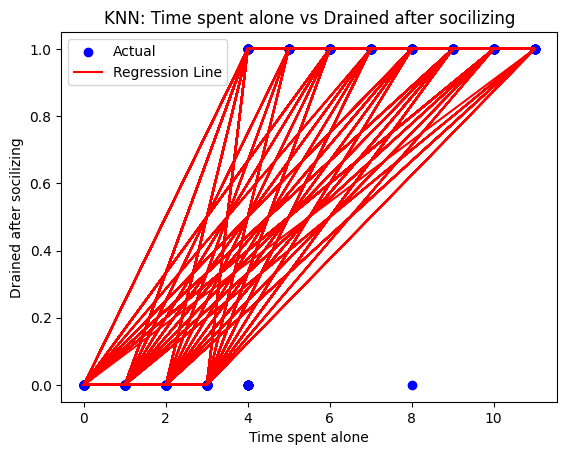

In [140]:

# Plot actual vs predicted
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Time spent alone')
plt.ylabel('Drained after socilizing')
plt.title('KNN: Time spent alone vs Drained after socilizing')
plt.legend()
plt.show()

# Model Building (Decision Tree Classifier)

In [141]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Model Evaluation

In [142]:
model_dtc.score(X_test, y_test)

0.972

## Confusion Matrix

In [143]:
y_pred = model_dtc.predict(X_test)
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[258,  14],
       [  0, 228]])

## Classification Report

In [144]:
cls = classification_report(y_test, y_pred)
print(cls)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       272
           1       0.94      1.00      0.97       228

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



# Model Building (Random Forest Classifier)

In [146]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators = 70)

model_rfc.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=70)

In [147]:
model_rfc.score(X_test, y_test)

0.972

## Confusion Matrix

In [148]:
y_pred = model_rfc.predict(X_test)

In [149]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[258,  14],
       [  0, 228]])

## Classification Report

In [150]:
cls = classification_report(y_test, y_pred)
print(cls)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       272
           1       0.94      1.00      0.97       228

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



# Model Building (SVM)

In [151]:
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [153]:
model_svm = svm.SVR(kernel='rbf')
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [154]:
y_pred = model_svm.predict(X_test)

## Model Evaluation

In [156]:
model_svm.score(X_test, y_test)

0.8736031445879765

## Confusion Matrix

In [158]:
print(y_test)
print(y_pred)

      Drained_after_socilizing
2626                         1
2096                         1
961                          1
2555                         1
1412                         0
...                        ...
2321                         0
2090                         0
2093                         1
1251                         1
477                          1

[500 rows x 1 columns]
[ 0.61065853  1.10029066  0.97467833  0.90037795 -0.10006599 -0.10006599
  0.61065853  0.61065853  0.90028858  0.90028858  0.10014028  0.61065853
  0.0995451   0.10014028  0.10014028  0.89954346  0.0995451   0.10014028
  0.90037795  0.97467833  1.10029066  0.90028858  0.10014028  0.90037795
 -0.10006599  0.97467833  0.61065853 -0.10006599  0.89954346  0.0172094
  0.89954346  0.97467833  0.97467833  0.0172094   0.90037795  0.0995451
  0.0172094   0.61065853 -0.10006599  0.89954346  0.61065853  0.90037795
  0.89954346  0.0172094   1.03128516  0.0995451   0.90040572 -0.10006599
 -0.10006599  0.900377

In [159]:
y_test_int = y_test.astype(int)
y_pred_int = y_predicted.astype(int)
y_pred = model_svm.predict(X_test)
con_mat = confusion_matrix(y_test_int, y_pred_int)
con_mat

array([[272,   0],
       [150,  78]])

## Classification Report

In [160]:
cls = classification_report(y_test_int, y_pred_int)
print(cls)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       272
           1       1.00      0.34      0.51       228

    accuracy                           0.70       500
   macro avg       0.82      0.67      0.65       500
weighted avg       0.81      0.70      0.66       500



# Prefered models: Decision Tree Classifier and Random Forest Classifier